In [1]:
using Distributions
using Roots
using Plots
using StatsFuns: logistic, logit

# \approx TAB → ≈
# \lessapprox TAB → ⪅
x ⪅ y = x < y || x ≈ y

⪅ (generic function with 1 method)

In [2]:
# Bernoulli分布モデルでの通常の信頼区間

"""P値函数(exact版)"""
function pvalue_exact(n, p, k)
    bin = Binomial(n, p)
    p0 = pdf(bin, k)
    s = sum(pdf(bin, j) for j in support(bin) if pdf(bin, j) ⪅ p0)
    min(1, s)
end

"""P値函数(正規分布近似)"""
function pvalue_normal(n, p, k)
    bin = Binomial(n, p)
    normal = Normal(mean(bin), std(bin))
    min(1, 2cdf(normal, k), 2ccdf(normal, k))
end

"""信頼区間函数"""
function confidence_interval(pvalue_func, n, k; α = 0.05)
    f(t) = pvalue_func(n, logistic(t), k) - α
    CI = logistic.(find_zeros(f, -10.0, 10.0))
    if length(CI) < 2
        return 2k ≤ n ? [0.0, first(CI)] : [first(CI), 1.0]
    else
        return [first(CI), last(CI)]
    end
end

confidence_interval

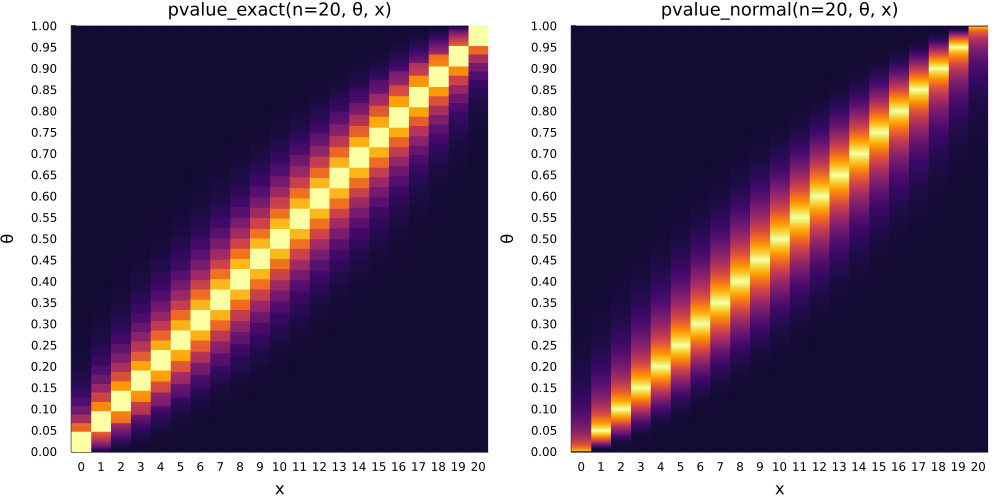

In [3]:
n = 20
x = 0:n
θ = 0:0.002:1
z_exact = pvalue_exact.(n, θ, x')
z_normal = pvalue_normal.(n, θ, x')

P = plot(; size=(500, 500), colorbar=false)
heatmap!(x, θ, z_exact; clim=(-0.1, 1.0))
plot!(; xlabel="x", ylabel="θ")
plot!(; xtick=0:n, ytick=0:0.05:1)
title!("pvalue_exact(n=$n, θ, x)"; titlefontsize=12)

Q = plot(; size=(500, 500), colorbar=false)
heatmap!(x, θ, z_normal; clim=(-0.1, 1.0))
plot!(; xlabel="x", ylabel="θ")
plot!(; xtick=0:n, ytick=0:0.05:1)
title!("pvalue_normal(n=$n, θ, x)"; titlefontsize=12)

plot(P, Q; size=(1000, 500))
plot!(; leftmargin=3Plots.mm, bottommargin=3Plots.mm)